<a href="https://colab.research.google.com/github/ahnjonghyunn/ABC/blob/main/CNN_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC_%EA%B0%9C%EC%99%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제정의:강아지(1), 고양이(0) 예측하는 이진 분류 문제

##1 데이터 준비하기

### Colab을 이용 -google api를 통해 데이터 불러오기

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2024-01-24 13:33:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  58.6MB/s    in 1.1s    

2024-01-24 13:33:42 (58.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### 데이터 폴더 나누기

In [ ]:
import os
import zipfile

#1) 앞축풀기
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#2) 데이터 경로 설정
rootPath = '/tmp/cats_and_dogs_filtered'

#훈련셋,검증셋 경로
train_dir = os.path.join(rootPath, 'train') # /tmp/cats_and_dogs_filtered/train
validation_dir = os.path.join(rootPath, 'validation') #/tmp/cats_and_dogs_filtered/validation

#훈련셋 중에 고양이 사진 경로
train_cats_dir =os.path.join(train_dir,'cats')# /tmp/cats_and_dogs_filtered/train/cats
#훈련셋 중에 강아지 사진 경로
train_dogs_dir = os.path.join(train_dir,'dogs') # /tmp/cats_and_dogs_filtered/train/dogs

#검증셋 중에 고양이 사진 경로
validation_cats_dir = os.path.join(validation_dir,'cats')# /tmp/cats_and_dogs_filtered/validation/cats
#검증셋 중에 강아지 사진 경로
validation_dogs_dir = os.path.join(validation_dir,'dogs')# /tmp/cats_and_dogs_filtered/validation/dogs


### 데이터 확인하기

컴벌루션 층

데이터 증식 사용
텍스트 반전은 안됨

In [ ]:
print('훈련 데이터 중 고양이 사진 수 : ', len(os.listdir(train_cats_dir)))
print('훈련 데이터 중 강아지 사진 수 : ', len(os.listdir(train_dogs_dir)))

print('검증 데이터 중 고양이 사진 수 : ', len(os.listdir(validation_cats_dir)))
print('검증 데이터 중 고양이 사진 수 : ', len(os.listdir(validation_cats_dir)))


훈련 데이터 중 고양이 사진 수 :  1000
훈련 데이터 중 강아지 사진 수 :  1000
검증 데이터 중 고양이 사진 수 :  500
검증 데이터 중 고양이 사진 수 :  500


### 데이터 증식

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

# 훈련 데이터 이미지 증식 + 스케일링
trainImageGenerator = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip = True,
                                         vertical_flip = True,
                                         shear_range = 0.5,
                                         brightness_range = [0.5, 1.5],
                                         zoom_range = 0.2,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         rotation_range = 30,
                                         fill_mode = 'nearest')
#테스트 이미지 -> 스케일링
testImageGenerator =  ImageDataGenerator(rescale=1./255)

In [ ]:
# 훈련 이미지 증식
trainGen = trainImageGenerator.flow_from_directory(
    os.path.join(rootPath,'train'),
    target_size=(64,64),
    class_mode='binary'
)

#테스트 이미지 스케일링
testGen = testImageGenerator.flow_from_directory(
    os.path.join(rootPath,'validation'),
    target_size=(64,64),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print(trainGen.class_indices)
print(testGen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


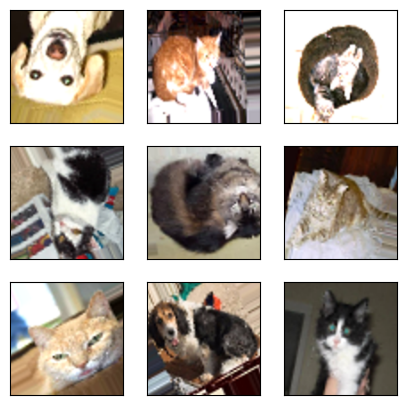

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

for i in range(9):
  data = next(trainGen)
  arr = data[0][0]
  plt.subplot(3, 3, i+1)
  plt.xticks([]) # 눈금 지우기
  plt.yticks([])
  img = array_to_img(arr).resize((128, 128))
  plt.imshow(img)

plt.show()

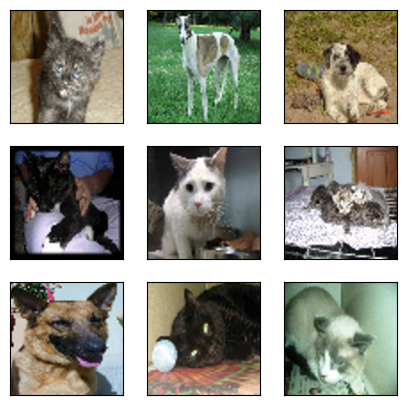

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

for i in range(9):
  data = next(testGen)
  arr = data[0][0]
  plt.subplot(3, 3, i+1)
  plt.xticks([]) # 눈금 지우기
  plt.yticks([])
  img = array_to_img(arr).resize((128, 128))
  plt.imshow(img)

plt.show()

##2 CNN 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(64,64,3))) # 3차원
model.add(layers.Conv2D(16,(3,3),(1,1), 'same', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32,(3,3),(1,1), 'same', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))




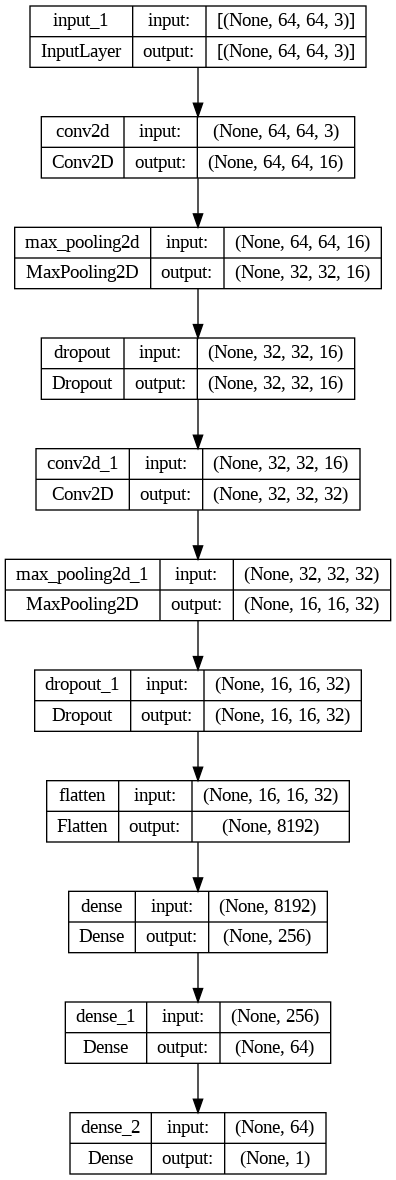

In [ ]:
from keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

##3 모델 설정하기

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


##4 모델 학습하기

In [ ]:
history = model.fit_generator(trainGen, epochs=64, validation_data=testGen)

<ipython-input-13-77f8b26909c9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(trainGen, epochs=64, validation_data=testGen)


Epoch 1/64
63/63 [==============================] - 21s 140ms/step - loss: 0.7089 - acc: 0.5005 - val_loss: 0.6929 - val_acc: 0.5450
Epoch 2/64
63/63 [==============================] - 9s 136ms/step - loss: 0.6916 - acc: 0.5365 - val_loss: 0.6897 - val_acc: 0.6010
Epoch 3/64
63/63 [==============================] - 7s 115ms/step - loss: 0.6901 - acc: 0.5325 - val_loss: 0.6839 - val_acc: 0.5120
Epoch 4/64
63/63 [==============================] - 9s 136ms/step - loss: 0.6786 - acc: 0.5585 - val_loss: 0.6730 - val_acc: 0.5750
Epoch 5/64
63/63 [==============================] - 9s 142ms/step - loss: 0.6592 - acc: 0.6040 - val_loss: 0.6483 - val_acc: 0.5990
Epoch 6/64
63/63 [==============================] - 7s 118ms/step - loss: 0.6448 - acc: 0.6330 - val_loss: 0.6398 - val_acc: 0.6190
Epoch 7/64
63/63 [==============================] - 9s 137ms/step - loss: 0.6339 - acc: 0.6300 - val_loss: 0.6264 - val_acc: 0.6420
Epoch 8/64
63/63 [==============================] - 9s 138ms/step - loss: 0

##5 성능 평가

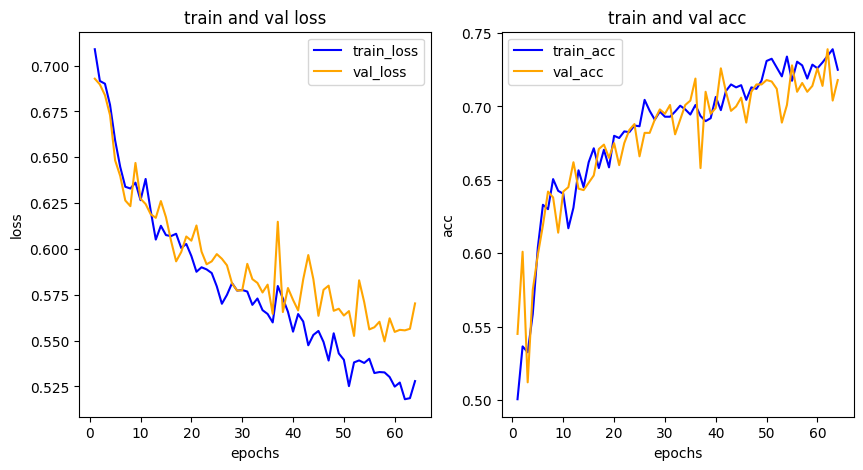

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

### 모델 평가하기

In [ ]:
model.evaluate_generator(testGen)

<ipython-input-15-8fd88d569edf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(testGen)


[0.5702948570251465, 0.7179999947547913]

### 모델 예측하기

1/1 [==============================] - 0s 17ms/step
정답: 고양이  label : 0
예측: 고양이  predicted value : [[0.1522063]]


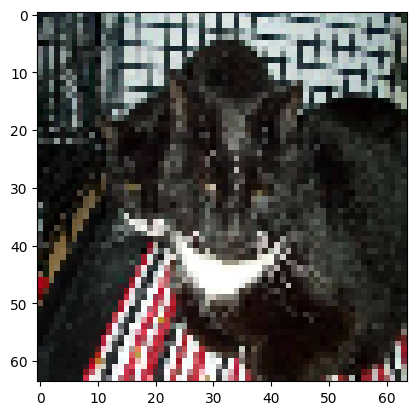

1/1 [==============================] - 0s 17ms/step
정답: 고양이  label : 0
예측: 고양이  predicted value : [[0.06069268]]


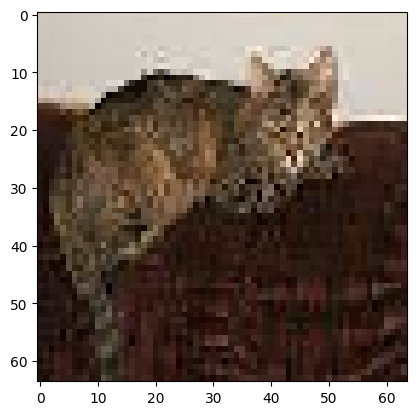

1/1 [==============================] - 0s 22ms/step
정답: 고양이  label : 0
예측: 고양이  predicted value : [[0.23412788]]


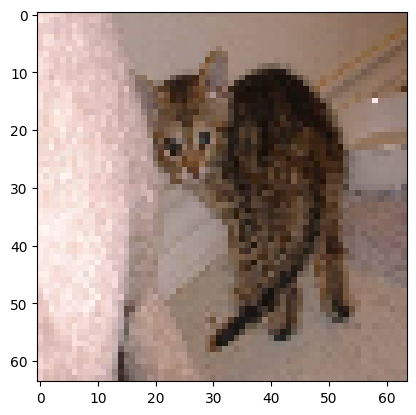

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

label_index = ['고양이', '강아지']

x, y = testGen.next()
for i in range(0,3):
  image = x[i]
  label = y[i].astype('int')

  y_prob = model.predict(image.reshape(1, 64, 64, 3))
  y_prob_class = (model.predict(image.reshape(1, 64, 64, 3)) > 0.5 ).astype('int')[0][0]
  print('정답: {}'.format(label_index[label]), ' label :', label)
  print('예측: {}'.format(label_index[y_prob_class]), ' predicted value :', y_prob)
  plt.imshow(image)
  plt.show()

##6 사전 학습 모델을 적용한 간단한 CNN 모델을 구성

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras.applications import ResNet50V2

#ResNet50 모델 불러오기
pre_trained_resnetv2 = ResNet50V2(include_top=False, input_shape=(64, 64, 3))
pre_trained_resnetv2.summary()


pre_model = Sequential()
pre_model.add(pre_trained_resnetv2)
pre_model.add(layers.GlobalAveragePooling2D())

pre_model.add(layers.Flatten())
pre_model.add(layers.Dense(64, activation='relu'))
pre_model.add(layers.Dense(1, activation='sigmoid'))

94668760/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 34, 34, 64)           0         ['conv1_conv[0][0]']          
                        

In [ ]:
#pre_model.summary()
pre_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = pre_model.fit(trainGen, epochs=64, validation_data=testGen)

In [ ]:
pre_model.evaluate(testGen)

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()